In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
RANDOM_STATE = 11

In [257]:
ls

churn-bigml-20.csv* churn-bigml-80.csv*


In [258]:
pwd

'/Users/henrikass/Downloads/jupiter-notebooks/archive'

In [259]:
telecom_df = pd.read_csv('./churn-bigml-80.csv')

In [260]:
telecom_df.head().T

,0,1,2,3,4
State,KS,OH,NJ,OH,OK
Account length,128,107,137,84,75
Area code,415,415,415,408,415
International plan,No,No,No,Yes,Yes
Voice mail plan,Yes,Yes,No,No,No
Number vmail messages,25,26,0,0,0
Total day minutes,265.1,161.6,243.4,299.4,166.7
Total day calls,110,123,114,71,113
Total day charge,45.07,27.47,41.38,50.9,28.34
Total eve minutes,197.4,195.5,121.2,61.9,148.3


In [261]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [262]:
telecom_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [263]:
telecom_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [264]:
telecom_df['Total charge'] = telecom_df['Total day charge'] 
+ telecom_df['Total eve charge'] 
+ telecom_df['Total night charge'] 
+ telecom_df['Total intl charge']


0       2.70
1       3.70
2       3.29
3       1.78
4       2.73
        ... 
2661    3.19
2662    2.67
2663    2.59
2664    3.81
2665    3.70
Name: Total intl charge, Length: 2666, dtype: float64

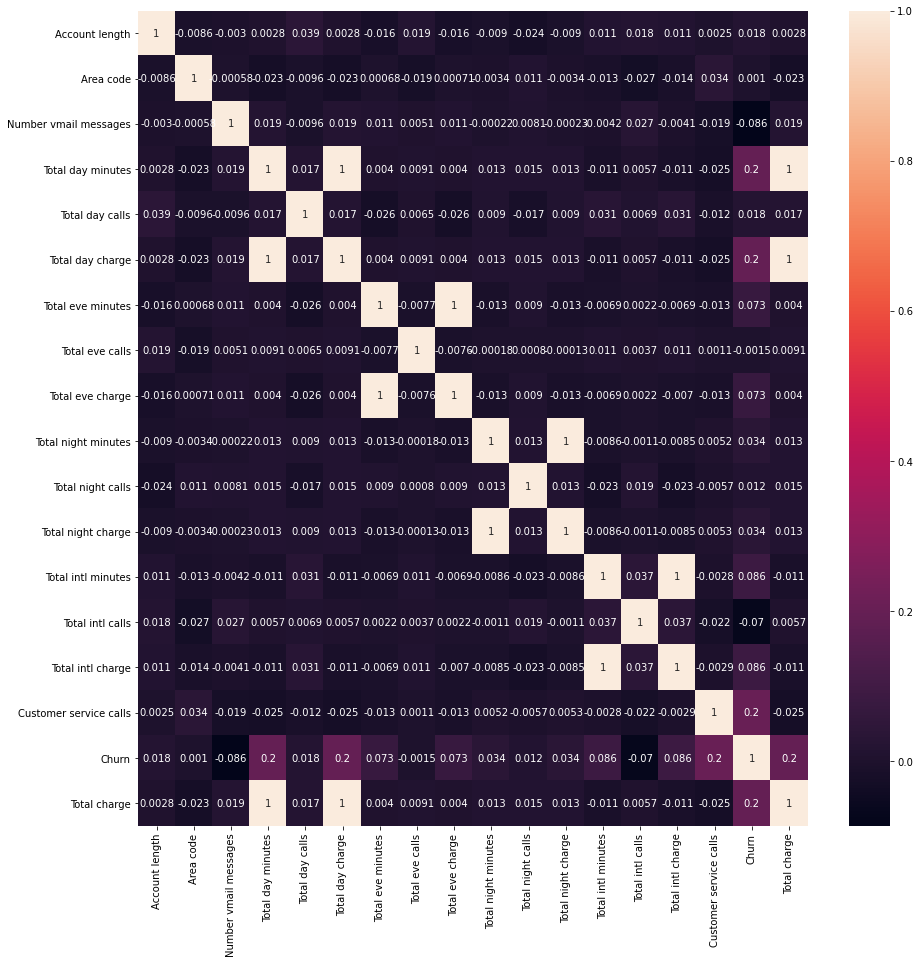

In [265]:
plt.figure(figsize=(15,15))
sns.heatmap(telecom_df.corr(), annot=True)

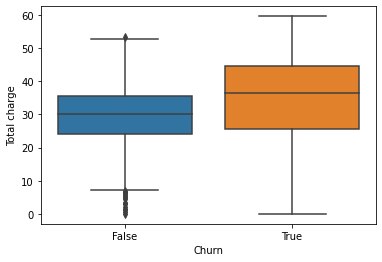

In [266]:
sns.boxplot(x='Churn',y='Total charge', data = telecom_df)

In [267]:
telecom_df['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

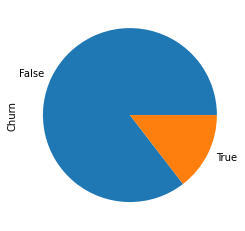

In [268]:
telecom_df['Churn'].value_counts().plot.pie()

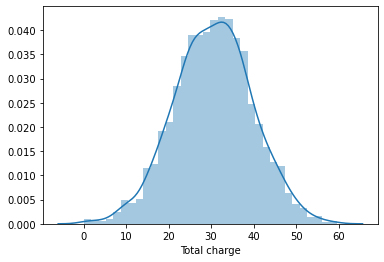

In [269]:
sns.distplot(telecom_df['Total charge'])

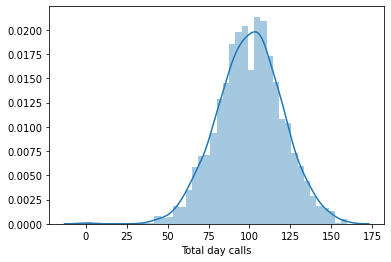

In [270]:
sns.distplot(telecom_df['Total day calls'])

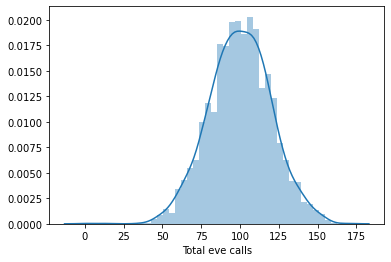

In [271]:
sns.distplot(telecom_df['Total eve calls'])

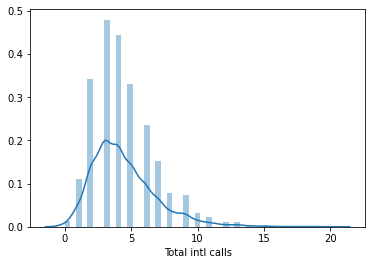

In [272]:
sns.distplot(telecom_df['Total intl calls'])

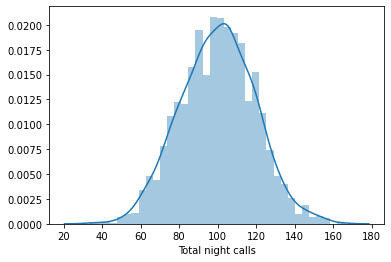

In [273]:
sns.distplot(telecom_df['Total night calls'])

In [274]:
telecom_df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls', 'Customer service calls'],
               ['Churn'], aggfunc='mean')

,Customer service calls,Total day calls,Total eve calls,Total night calls
Churn,,,,
False,1.453029,100.159350,100.036435,100.007902
True,2.206186,101.195876,99.948454,100.682990


In [275]:
telecom_df["International plan"].value_counts()

No     2396
Yes     270
Name: International plan, dtype: int64

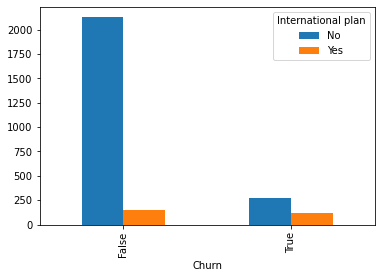

In [276]:
telecom_df.groupby(['Churn', 'International plan']).Churn.count().unstack().plot.bar(legend=True)

plt.show()

In [277]:
telecom_df['Churn'].sum()

388

In [278]:
print('Churn percent is: %{}'.format((telecom_df['Churn'].sum()) *100/telecom_df.shape[0]) )


Churn percent is: %14.553638409602401


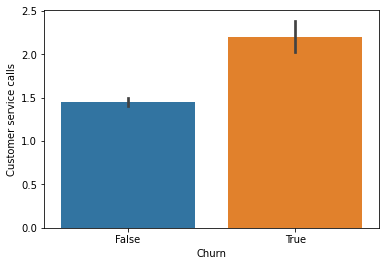

In [279]:
sns.barplot(x='Churn', y='Customer service calls',data=telecom_df)

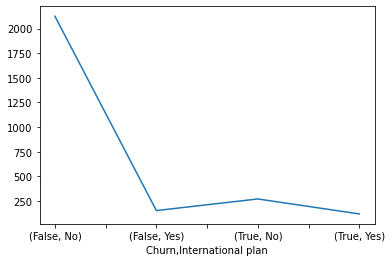

In [280]:
churn_intl = telecom_df.groupby(['Churn','International plan']).size()
churn_intl.plot()
plt.show()

In [281]:
telecom_df['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [282]:
churn_true = telecom_df.loc[telecom_df.Churn == True]

In [283]:
churn_customer_calls = churn_true[churn_true['Churn'] & churn_true['Customer service calls']]

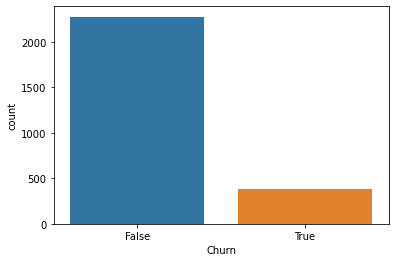

In [284]:
sns.countplot(telecom_df['Churn'])

In [285]:
feature_columns = telecom_df.columns.to_list()

In [286]:
feature_columns.remove('State')
feature_columns.remove('Churn')

In [287]:
telecom_df['Churn'] = telecom_df['Churn'].map({True:1,False:0})

In [288]:
telecom_df['International plan'].replace(['No','Yes'],[0,1],inplace=True)

In [289]:
telecom_df['Voice mail plan'].replace(['No','Yes'],[0,1],inplace=True)

In [290]:
feature_columns

['Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Total charge']

In [291]:
important_columns = [
 'International plan',
 'Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge',
 'Customer service calls',
 'Total charge']

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


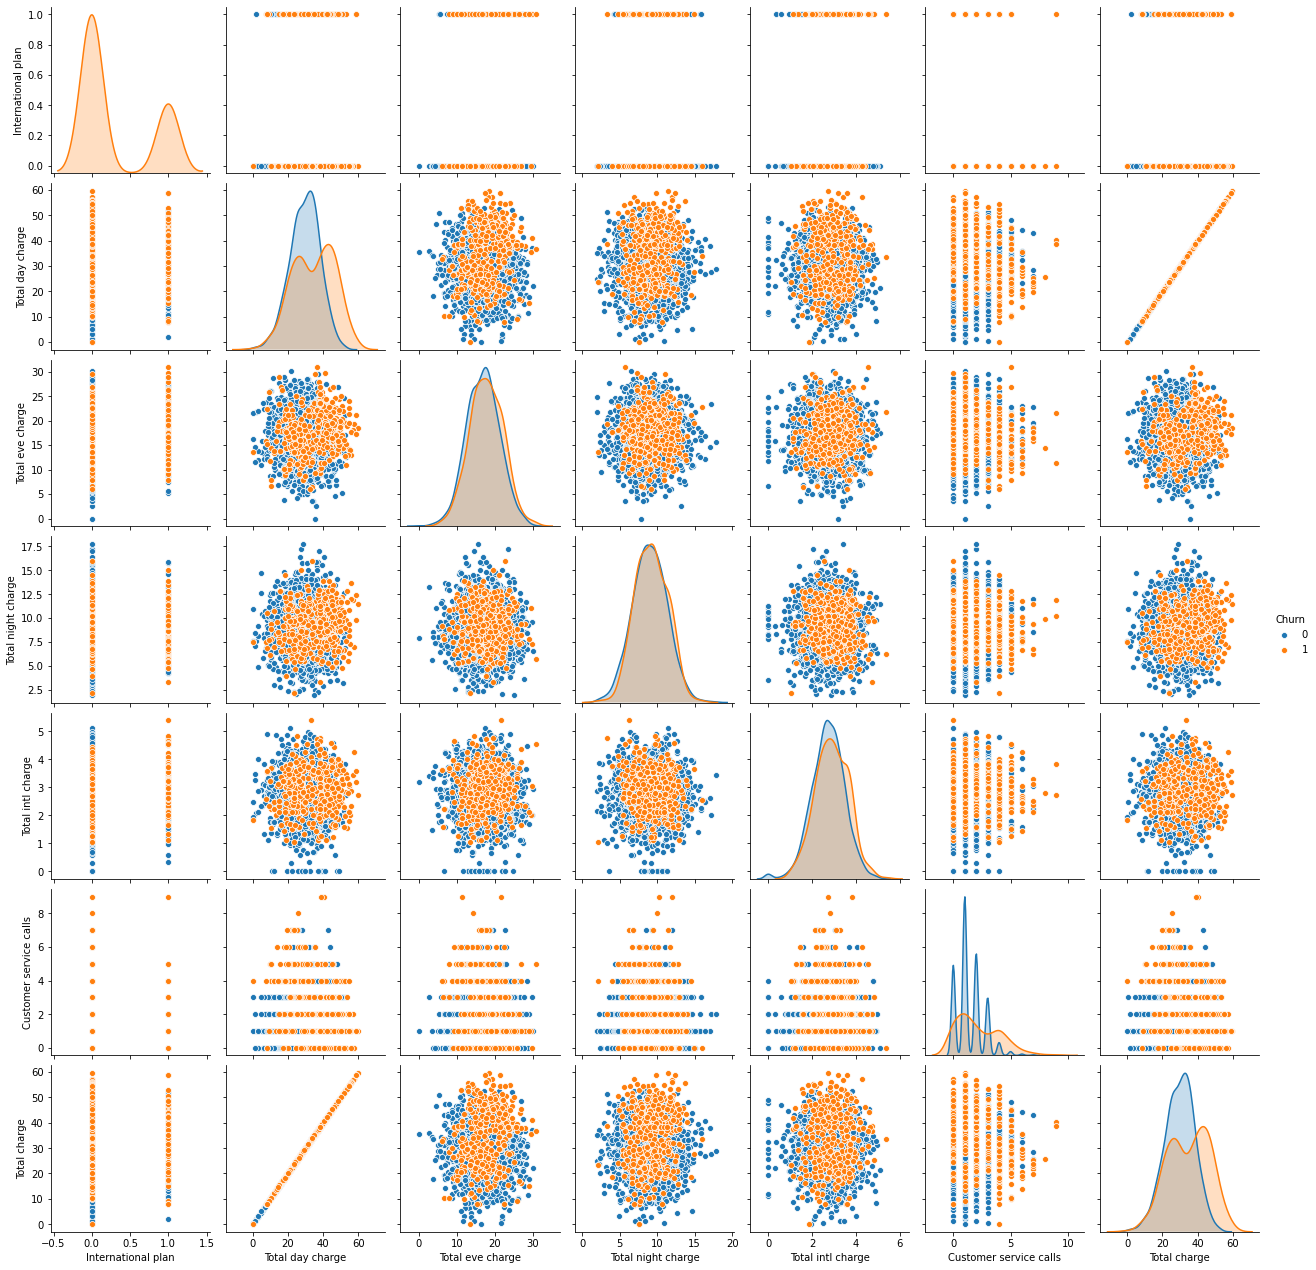

In [292]:
sns.pairplot(telecom_df, hue='Churn', vars=important_columns)

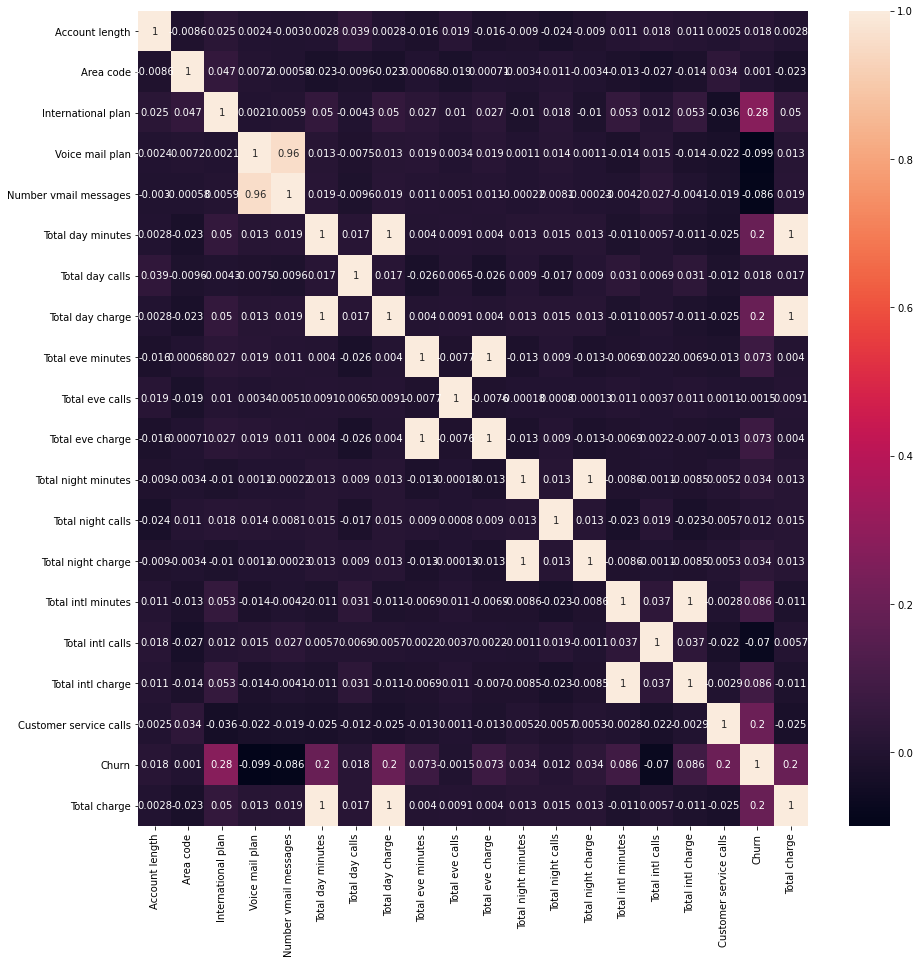

In [293]:
plt.figure(figsize=(15,15))
sns.heatmap(telecom_df.corr() , annot =True)

In [294]:
features = ['Total charge', 'Customer service calls', 'International plan']
X = telecom_df[features]
y = telecom_df['Churn']

In [295]:
X.head().T

,0,1,2,3,4
Total charge,45.07,27.47,41.38,50.9,28.34
Customer service calls,1.00,1.00,0.00,2.0,3.00
International plan,0.00,0.00,0.00,1.0,1.00


In [296]:
from sklearn.preprocessing import StandardScaler

In [297]:
scaler = StandardScaler()

In [298]:
scaled_features = scaler.fit_transform(X)

In [299]:
df_features = pd.DataFrame(scaled_features, columns=features)
df_features.head().T

,0,1,2,3,4
Total charge,1.579942,-0.330194,1.179465,2.212675,-0.235772
Customer service calls,-0.429172,-0.429172,-1.191955,0.333610,1.096392
International plan,-0.335690,-0.335690,-0.335690,2.978938,2.978938


In [300]:
from sklearn.model_selection import train_test_split

In [301]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8)

In [302]:
X_train.shape

(2132, 3)

In [303]:
X_val.shape

(534, 3)

In [304]:
y_train.shape

(2132,)

In [305]:
y_val.shape

(534,)

In [319]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score

In [307]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_result = model_selection.cross_val_score(model,X_train,y_train, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.8625707516124785
LDA 0.8531832740994252
KNN 0.8771269360712562
CART 0.8410030275108596
RF 0.8447545083585626
NB 0.845689087797815
SVM 0.8667917160282569


In [308]:
from sklearn.model_selection import GridSearchCV

In [309]:
chosen_model = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7]}
grid = GridSearchCV(estimator= chosen_model, param_grid=param, cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'n_neighbors': 5}


In [310]:
best_model = KNeighborsClassifier(n_neighbors=5)
best_model.fit(X_train,y_train)
pred_val = best_model.predict(X_val)


In [311]:
from sklearn.metrics import accuracy_score

In [312]:
print(accuracy_score(y_val, pred_val))

0.846441947565543


In [313]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [314]:
print(confusion_matrix(y_val, pred_val))

[[422  23]
 [ 59  30]]


In [315]:
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       445
           1       0.57      0.34      0.42        89

    accuracy                           0.85       534
   macro avg       0.72      0.64      0.67       534
weighted avg       0.83      0.85      0.83       534



In [316]:
from sklearn.cluster import KMeans

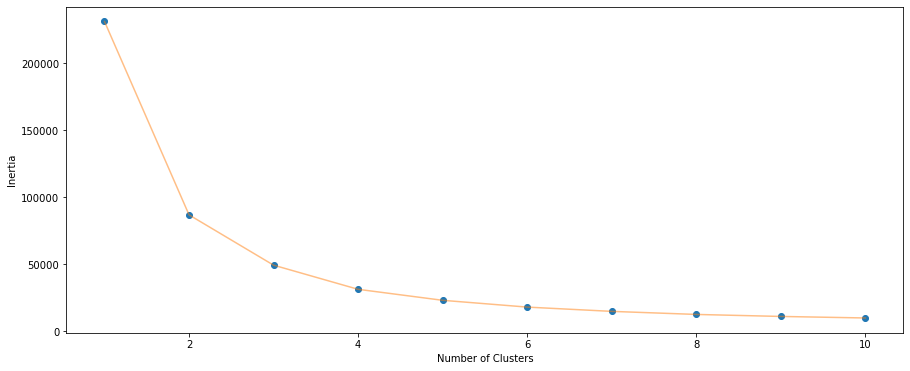

In [317]:
clust_data = X
inertia = []
for i in range(1,11):
    clust_model = KMeans(n_clusters= i , init='k-means++', n_init=10)
    clust_model.fit(clust_data)
    inertia.append(clust_model.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [320]:
clust_model = KMeans(n_clusters= 4 , init='k-means++', n_init=10)
clusters = clust_model.fit_predict(clust_data)
print(silhouette_score(clust_data, clusters))

0.4737447418356567


In [324]:
telecom_df['clusters'] = pd.Series(clusters,index=telecom_df.index)
telecom_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge,clusters
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,45.07,2
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,27.47,3
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,41.38,2
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,50.90,2
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,28.34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,0,0,0,134.7,98,22.90,189.7,...,221.4,128,9.96,11.8,5,3.19,2,0,22.90,3
2662,AZ,192,415,0,1,36,156.2,77,26.55,215.5,...,279.1,83,12.56,9.9,6,2.67,2,0,26.55,3
2663,WV,68,415,0,0,0,231.1,57,39.29,153.4,...,191.3,123,8.61,9.6,4,2.59,3,0,39.29,0
2664,RI,28,510,0,0,0,180.8,109,30.74,288.8,...,191.9,91,8.64,14.1,6,3.81,2,0,30.74,0


In [326]:
clust_churn = telecom_df.groupby('clusters').Churn.sum()
clust_churn

clusters
0     76
1     50
2    158
3    104
Name: Churn, dtype: int64

In [327]:
telecom_df['clusters'].value_counts()

0    936
3    903
2    435
1    392
Name: clusters, dtype: int64

In [329]:
telecom_df['charge'] = telecom_df['Total charge']
charge_clust = telecom_df.groupby('clusters').charge.mean()
charge_clust

clusters
0    34.552340
1    16.008061
2    44.362851
3    25.949147
Name: charge, dtype: float64

In [188]:
rfc_gs = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        "n_estimators": np.linspace(10, 500, 3).astype(int),
        "min_samples_leaf": np.linspace(1, 100, 3).astype(int),
        "max_depth": np.linspace(10, 100, 3).astype(int),
        "max_features": ['sqrt', 'log2', 0.1],
    },
    n_jobs=-1,
    cv=5,
    verbose=1,
)

In [189]:
rfc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 10,  55, 100]),
                         'max_features': ['sqrt', 'log2', 0.1],
                         'min_samples_leaf': array([  1,  50, 100]),
                         'n_estimators': array([ 10, 255, 500])},
             verbose=1)

In [190]:
rfc_gs.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 50,
 'n_estimators': 10}

In [191]:
rfc_gs.best_estimator_

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=50,
                       n_estimators=10)

In [196]:
rfc_gs.best_score_

0.8771228463678244

In [200]:
rfc_gs_val_preds = rfc_gs.predict(X_val)

In [201]:
print(confusion_matrix(y_val, rfc_gs_val_preds))

[[441  16]
 [ 63  14]]


In [202]:
print(classification_report(y_val, rfc_gs_val_preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       457
           1       0.47      0.18      0.26        77

    accuracy                           0.85       534
   macro avg       0.67      0.57      0.59       534
weighted avg       0.82      0.85      0.82       534

